In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
path= 'C:/Users/hmdebern.UTMB-USERS-M/Desktop/test day hour/4_25_2022_day/'
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            
        
# data=data.drop(columns=["new_Median","new_sd","gumbel_Median","gumbel _sd"])

In [3]:
data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])

In [4]:
print(data.shape)
print(data.columns)

(32620, 11)
Index(['proteinName', 'peptideSeq', 'old_Rsquared', 'new_Rsquared', 'NDP',
       'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'Protein'],
      dtype='object')


In [5]:
data=data[data.NDP >=4]
print(data.shape)

(29723, 11)


In [6]:
data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])

## Rsquared >= 90

In [7]:
data[data.old_Rsquared>=0.9].shape[0]/data.shape[0]

0.23298455741345087

In [8]:
data[data.new_Rsquared>=0.9].shape[0]/data.shape[0]

0.45860108333613697

## Rsquared >= 95

In [9]:
data[data.old_Rsquared>=0.95].shape[0]/data.shape[0]

0.12683780237526496

In [10]:
data[data.new_Rsquared>=0.95].shape[0]/data.shape[0]

0.3319987888167412

## Rsquared >= 80

In [11]:
data[data.old_Rsquared>=0.8].shape[0]/data.shape[0]

0.3419574067220671

In [12]:
data[data.new_Rsquared>=0.8].shape[0]/data.shape[0]

0.5849342260202537

In [13]:
conditions = [
    (data.old_Rsquared < 0.80)  ,
    (data.old_Rsquared >= 0.80) & (data.old_Rsquared < 0.90),
    (data.old_Rsquared >= 0.90) & (data.old_Rsquared < 0.95),
    (data.old_Rsquared >=0.95)]
choices = ["< 80", "80 =< x < 90", "90 =< x < 95", ">=95"]
data['old_class'] = np.select(conditions, choices, default=0)

conditions = [
    (data.new_Rsquared < 0.80)  ,
    (data.new_Rsquared >= 0.80) & (data.new_Rsquared < 0.90),
    (data.new_Rsquared >= 0.90) & (data.new_Rsquared < 0.95),
    (data.new_Rsquared >=0.95)]
choices = ["< 80", "80 =< x < 90", "90 =< x < 95", ">=95"]
data['new_class'] = np.select(conditions, choices, default=0)

In [14]:
data.head()

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class
0,1433B_MOUSE,DSTLImQLLR,0.405407,0.842207,8,0.63353,0.500928,1.913215e+07,603.33154,0.109762,1433B_MOUSE,0.436800,< 80,80 =< x < 90
1,1433B_MOUSE,AVTEQGHELSNEER,-0.515961,-0.132980,7,0.47244,0.510142,4.919352e+07,533.58502,0.241501,1433B_MOUSE,0.382982,< 80,< 80
2,1433B_MOUSE,LAEQAERYDDMAAAMK,-0.067008,0.388974,5,0.13982,0.087811,1.312825e+08,906.91638,0.086949,1433B_MOUSE,0.455982,< 80,< 80
3,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.937993,0.978693,8,0.39895,0.039049,1.747170e+07,1080.00488,0.016933,1433B_MOUSE,0.040700,90 =< x < 95,>=95
4,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.636834,0.973459,9,0.27219,0.065604,2.121646e+07,720.33905,0.047914,1433B_MOUSE,0.336625,< 80,>=95


In [15]:
data=data[data.old_class!='0']
data=data[data.new_class!='0']

In [16]:
print(data.groupby(['old_class'])['old_class'].count())

old_class
80 =< x < 90     3239
90 =< x < 95     3155
< 80            19549
>=95             3770
Name: old_class, dtype: int64


<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='old_class'>

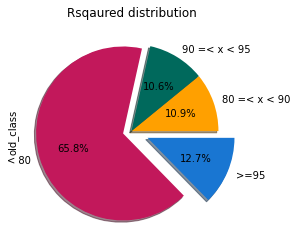

In [17]:
data.groupby(['old_class'])['old_class'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0,0,0.1, 0.2), 
                                                      colors = ['#FFA000','#00695C','#C2185B', '#1976D2'],
                                title='Rsqaured distribution')

In [18]:
data.groupby(['new_class'])['new_class'].count()

new_class
80 =< x < 90     3755
90 =< x < 95     3763
< 80            12327
>=95             9868
Name: new_class, dtype: int64

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='new_class'>

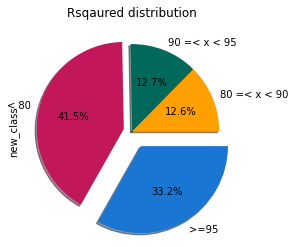

In [19]:
data.groupby(['new_class'])['new_class'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0,0,0.1, 0.2), 
                                                      colors = ['#FFA000','#00695C','#C2185B', '#1976D2'],
                                title='Rsqaured distribution')

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='g80_old'>

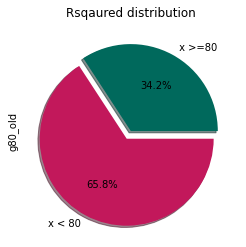

In [20]:
conditions = [
    (data.old_Rsquared < 0.80),
    (data.old_Rsquared >=0.8)]
choices = ["x < 80", " x >=80 "]
data['g80_old'] = np.select(conditions, choices, default=0)
data.groupby(['g80_old'])['g80_old'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0, 0.1), 
                                                      colors = ['#00695C', '#C2185B'],
                                title='Rsqaured distribution')

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='g80_new'>

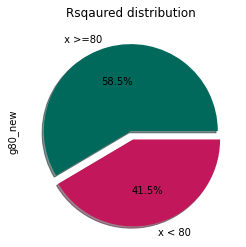

In [21]:
conditions = [
    (data.new_Rsquared < 0.80),
    (data.new_Rsquared >=0.8)]
choices = ["x < 80", " x >=80 "]
data['g80_new'] = np.select(conditions, choices, default=0)
data.groupby(['g80_new'])['g80_new'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0, 0.1), 
                                                      colors = ['#00695C', '#C2185B'],
                                title='Rsqaured distribution')

In [22]:
pd.DataFrame(data.groupby(['new_class'])['new_class'].count())

,new_class
new_class,
80 =< x < 90,3755
90 =< x < 95,3763
< 80,12327
>=95,9868


In [23]:
list(data.groupby(['new_class'])['new_class'].count())

[3755, 3763, 12327, 9868]

In [24]:
list((data.groupby(['old_class'])['old_class'].count()))

[3239, 3155, 19549, 3770]

<AxesSubplot:>

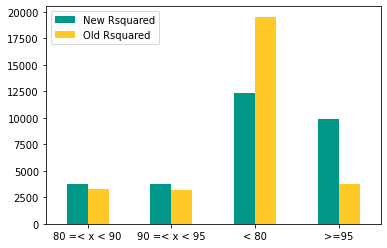

In [25]:
dataforbarchart= pd.DataFrame()
dataforbarchart["New Rsquared"]=list(data.groupby(['new_class'])['new_class'].count())
dataforbarchart["Old Rsquared"]=list(data.groupby(['old_class'])['old_class'].count())
dataforbarchart.index=["80 =< x < 90","90 =< x < 95","< 80",">=95"]
dataforbarchart.plot.bar(rot=0,color = ['#009688', '#FFCA28'])

<AxesSubplot:>

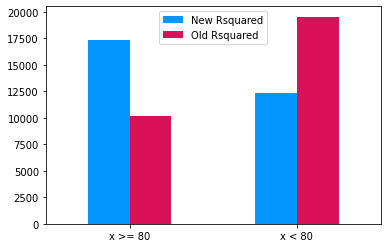

In [42]:
dataforbarchart2= pd.DataFrame()
dataforbarchart2["New Rsquared"]=list(data.groupby(['g80_new'])['g80_new'].count())
dataforbarchart2["Old Rsquared"]=list(data.groupby(['g80_old'])['g80_old'].count())
dataforbarchart2.index=["x >= 80","x < 80"]
dataforbarchart2.plot.bar(rot=0,color = ['#0396fe', '#d91159'])

<AxesSubplot:>

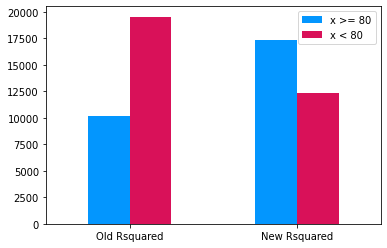

In [41]:
# (dataforbarchart2.transpose()).plot.bar(rot=0,color = ['#009688', '#FFCA28'])
 
(dataforbarchart2[["Old Rsquared","New Rsquared"]].transpose()).plot.bar(rot=0,color = ['#0396fe', '#d91159'])

Text(0, 0.5, 'New Rsquared')

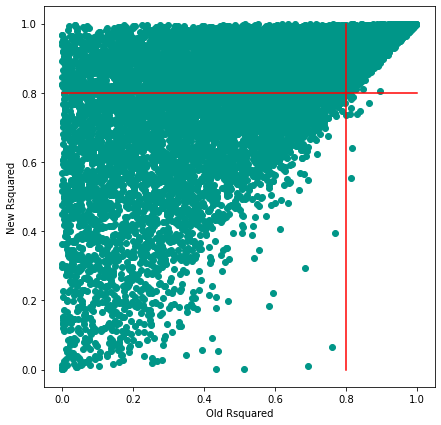

In [56]:
fig = plt.figure(figsize =(7, 7))
temp_data=data[ (data.old_Rsquared>0) & (data.new_Rsquared>0)]
plt.scatter(temp_data.old_Rsquared,temp_data.new_Rsquared,c='#009688')
plt.plot(range(0,len(temp_data.shape)),[0.8]*len(temp_data.shape),c='r')
plt.plot([0.8]*len(temp_data.shape),range(0,len(temp_data.shape)),c='r')
plt.xlabel('Old Rsquared')
plt.ylabel('New Rsquared')

Text(0, 0.5, 'New Rsquared')

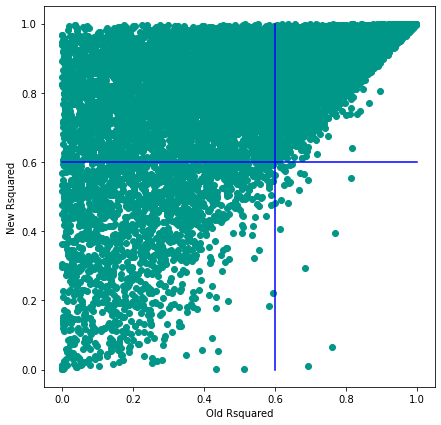

In [57]:
fig = plt.figure(figsize =(7, 7))
temp_data=data[ (data.old_Rsquared>0) & (data.new_Rsquared>0)]
plt.scatter(temp_data.old_Rsquared,temp_data.new_Rsquared,c='#009688')
# plt.plot(range(0,len(temp_data.shape)),[0.8]*len(temp_data.shape),c='r')
# plt.plot([0.8]*len(temp_data.shape),range(0,len(temp_data.shape)),c='r')

plt.plot(range(0,len(temp_data.shape)),[0.6]*len(temp_data.shape),c='b')
plt.plot([0.6]*len(temp_data.shape),range(0,len(temp_data.shape)),c='b')
plt.xlabel('Old Rsquared')
plt.ylabel('New Rsquared')

In [28]:
data[data['old_class']=='0'].head(40)

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class,g80_old,g80_new


In [29]:
data[data['new_class']=='0'].head(10)

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class,g80_old,g80_new


In [30]:
data[data.old_Rsquared>data.new_Rsquared].shape[0]/data.shape[0]

0.12654393699727393

In [31]:
data[data.old_Rsquared<data.new_Rsquared].shape[0]/data.shape[0]

0.8676673509911487

In [32]:
data[data.old_Rsquared==data.new_Rsquared].shape[0]/data.shape[0]

0.005788712011577424

In [33]:
# data[data.old_Rsquared>data.new_Rsquared].head()

In [34]:
data.describe()

,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,diff
count,29713.000000,29713.000000,29713.000000,29713.000000,2.969000e+04,2.971300e+04,29713.000000,29713.000000,29713.000000
mean,0.238925,-36.091040,7.780096,0.754559,3.172779e+10,3.231739e+08,775.540103,0.053534,37.039291
std,1.460903,4112.151713,1.561553,16.979193,5.466706e+12,1.590243e+09,214.313208,0.042727,4112.139136
min,-101.910443,-703971.995601,4.000000,0.000000,3.205487e-04,0.000000e+00,380.471740,0.001865,0.000000
25%,-0.046446,0.473617,7.000000,0.095850,2.196105e-02,1.901593e+07,613.957580,0.021378,0.050691
50%,0.532203,0.874055,9.000000,0.222960,4.490001e-02,5.588191e+07,746.342830,0.040104,0.190601
75%,0.889550,0.969437,9.000000,0.424210,1.139849e-01,1.803703e+08,909.462650,0.074266,0.538783
max,0.998205,0.999800,9.000000,2869.330750,9.419565e+14,8.192110e+10,1396.199220,0.476872,703971.830237


In [35]:
data[data.new_Rsquared < -4447]

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class,g80_old,g80_new
37,ACSM1_MOUSE,WNDHDSPEEFNFASDVLDYWAQMEEEGKR,0.109525,-5402.417926,5,0.02309,0.022435,5.646654e+06,1182.17224,0.014745,ACSM1_MOUSE,5402.527451,< 80,< 80,x < 80,x < 80
42,ACTN4_MOUSE,KHEAFESDLAAHQDRVEQIAAIAQELNELDYYDSHNVNTR,-0.375688,-15683.283291,7,0.00011,0.049249,6.306432e+07,928.84656,0.060074,ACTN4_MOUSE,15682.907604,< 80,< 80,x < 80,x < 80
4,CP4CB_MOUSE,SYIQAVEDLNNLFFLR,0.014181,-5041.797641,8,0.00453,0.017174,7.789030e+06,971.50708,0.088417,CP4CB_MOUSE,5041.811823,< 80,< 80,x < 80,x < 80
163,CPSM_MOUSE,IAPSFAVESMEDALKAADTIGYPVMIR,-0.009751,-6846.551492,9,0.00000,0.010262,5.676569e+08,965.82587,0.042271,CPSM_MOUSE,6846.541741,< 80,< 80,x < 80,x < 80
219,CPSM_MOUSE,IYAIAkALENNMSLDEIVR,-0.080338,-7570.833443,9,0.00495,0.012036,7.162785e+06,735.72430,0.064300,CPSM_MOUSE,7570.753105,< 80,< 80,x < 80,x < 80
3,FA98A_MOUSE,GPLLDDGALLQAVSAGAASPEFTK,0.055225,-10317.975737,8,0.00552,0.014267,1.127024e+07,1164.60767,0.067843,FA98A_MOUSE,10318.030962,< 80,< 80,x < 80,x < 80
28,FLNA_MOUSE,FNEEHIPDSPFVVPVASPSGDAR,-1.220284,-45730.608834,6,0.00937,0.011654,4.093524e+06,1234.09802,0.054580,FLNA_MOUSE,45729.388550,< 80,< 80,x < 80,x < 80
1,KPRB_MOUSE,ASPFLLQYIQEEIPDYR,-0.341872,-18001.948515,5,0.02757,0.131671,2.503898e+07,1041.53076,0.163427,KPRB_MOUSE,18001.606643,< 80,< 80,x < 80,x < 80
38,PCCA_MOUSE,RLAAEDVTFIGPDTHAIQAMGDK,-0.529106,-41775.247114,5,0.02975,0.035074,5.157442e+06,819.41278,0.044472,PCCA_MOUSE,41774.718008,< 80,< 80,x < 80,x < 80
23,PGBM_MOUSE,VIPYFTQTPYSFLPLPTIK,-0.464310,-6372.176816,9,0.00595,0.010777,1.923170e+07,742.41339,0.039310,PGBM_MOUSE,6371.712506,< 80,< 80,x < 80,x < 80


In [36]:
min(data.new_Rsquared)

-703971.995600884

In [37]:
from sklearn import metrics
import scipy
import numpy as np

In [38]:
yexp=[0.3427750932611498,0.08094025327769315,0.0928883800839536,0.066779723942465827,
0.047197637792798015,0.070799860702632791,0.0728408749994044,0.14940929381691573,
0.10398864451878329]

In [39]:
yth=[
    0.33043999999999996,0.12954042528342788,0.12951103393282412,0.12951102963290714,0.12951102963227806,
0.12951102963227798,0.12951102963227798,0.12951102963227798,0.12951102963227798
]

In [40]:
yse=[
    0.329680705305766,0.091174415410932658,0.095798190649067416,0.066779723942465827,0.048507447570481546,0.070799860702632791,
0.0728408749994044,0.12847444738471661,0.10815684266593953]

In [41]:
metrics.r2_score(yth,yexp)

0.3793588165235331

In [42]:
metrics.r2_score(yth,yse)

0.4364974709815369

In [43]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2


In [44]:
rsquared(yth,yexp)

0.8977485861904252

In [45]:
rsquared(yth,yse)

0.9203614191336668

In [46]:
np.mean(yse)

0.11246805651460076